In [ ]:
import pandas as pd
import numpy as np

process_date_no_dash = "20210216"
project_id = "feisty-current-258112"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Saya sudah mengecek data dengan BigQuery ternyata data dari 2012 hingga 2021 lengkap

In [ ]:
query = "Select  * FROM `bigquery-public-data.iowa_liquor_sales.sales` WHERE EXTRACT(year from date) = 2012 LIMIT 200000 ".format(process_date_no_dash)
df_12 = pd.read_gbq(query, project_id=project_id, dialect='standard')

In [ ]:
col = df_12.columns
col

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [ ]:
sql = 'WHERE'
for i in col:
  sql = sql+' '+str(i)+' IS NOT NULL AND'
sql

'WHERE invoice_and_item_number IS NOT NULL AND date IS NOT NULL AND store_number IS NOT NULL AND store_name IS NOT NULL AND address IS NOT NULL AND city IS NOT NULL AND zip_code IS NOT NULL AND store_location IS NOT NULL AND county_number IS NOT NULL AND county IS NOT NULL AND category IS NOT NULL AND category_name IS NOT NULL AND vendor_number IS NOT NULL AND vendor_name IS NOT NULL AND item_number IS NOT NULL AND item_description IS NOT NULL AND pack IS NOT NULL AND bottle_volume_ml IS NOT NULL AND state_bottle_cost IS NOT NULL AND state_bottle_retail IS NOT NULL AND bottles_sold IS NOT NULL AND sale_dollars IS NOT NULL AND volume_sold_liters IS NOT NULL AND volume_sold_gallons IS NOT NULL AND'

In [ ]:
query = "Select  * FROM `bigquery-public-data.iowa_liquor_sales.sales` "+sql+" EXTRACT(year from date) = 2012 LIMIT 200000;".format(process_date_no_dash)
df = pd.read_gbq(query, project_id=project_id, dialect='standard')

In [ ]:
for year in range(2013,2022):
  query = "Select  * FROM `bigquery-public-data.iowa_liquor_sales.sales` "+sql+" EXTRACT(year from date) = "+str(year)+" LIMIT 200000;".format(process_date_no_dash)
  df_t = pd.read_gbq(query, project_id=project_id, dialect='standard')
  df = pd.concat([df,df_t])

In [ ]:
df.tail()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
178057,INV-33875500129,2021-01-29,2624,Hy-Vee #2 / Dubuque,2395 NW Arterial Rd,Dubuque,52002,POINT (-90.741064 42.516633),31,DUBUQUE,1701100,Temporary & Specialty Packages,420,MOET HENNESSY USA,101188,Hennessy V.S.O.P NBA 2020 Giftbox,12,750,30.99,46.49,2,92.98,1.5,0.39
178058,INV-33788600010,2021-01-26,2660,HY-VEE FOOD STORE / SIOUX CENTER,1951 S Main Ave,Sioux Center,51250,POINT (-96.175695 43.056471),84,SIOUX,1701100,Temporary & Specialty Packages,260,DIAGEO AMERICAS,77903,Smirnoff Peppermint Twist,12,750,8.25,12.38,2,24.76,1.5,0.39
178059,INV-33519200044,2021-01-15,3403,Econ-o-mart / Columbus Junction,103 Walnut St. E,Columbus Junction,52738,POINT (-91.359363 41.280107),58,LOUISA,1701100,Temporary & Specialty Packages,065,Jim Beam Brands,20920,Old Tub,12,750,11.00,16.50,2,33.00,1.5,0.39
178060,INV-33557800018,2021-01-18,3805,Washington Street Mini Mart,1601 Washington St,Davenport,52804,POINT (-90.596253 41.535982),82,SCOTT,1701100,Temporary & Specialty Packages,260,DIAGEO AMERICAS,65332,Ciroc White Grape,12,750,16.49,24.74,2,49.48,1.5,0.39
178061,INV-33248500076,2021-01-06,3704,Celtics Beverage Company,1122 Broadway,Emmetsburg,50536,POINT (-94.678807 43.10937),74,PALO ALTO,1701100,Temporary & Specialty Packages,260,DIAGEO AMERICAS,72911,Captain Morgan Orange Vanilla Twist,12,750,9.06,13.59,2,27.18,1.5,0.39


In [ ]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S09349400004,2012-12-06,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,DAVENPORT,52807,POINT (-90.513769 41.574973),82,Scott,1011500,STRAIGHT RYE WHISKIES,306,Mississippi River Distilling Co.,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57
1,S09502700005,2012-12-17,2604,Hy-Vee Wine and Spirits / Lemars,1201 12TH AVE SW,LEMARS,51031,POINT (-96.18335000000002 42.778257),75,Plymouth,1081700,DISTILLED SPIRITS SPECIALTY,346,"Ole Smoky Distillery, LLC",86724,Ole Smoky Apple Pie Moonshine,12,750,15.08,22.62,36,814.32,27.0,7.13
2,S08968400072,2012-11-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,POINT (-90.611972 41.538207),82,Scott,1011500,STRAIGHT RYE WHISKIES,306,Mississippi River Distilling Co.,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57
3,S08974000005,2012-11-15,3838,Schnucks / Bettendorf,858 MIDDLE RD,BETTENDORF,52722,POINT (-90.520013 41.539421),48,Iowa,1011500,STRAIGHT RYE WHISKIES,306,Mississippi River Distilling Co.,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57
4,S04572500001,2012-03-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,POINT (-90.611972 41.538207),82,Scott,1701100,DECANTERS & SPECIALTY PACKAGES,192,Sidney Frank Importing Co.,3310,Jagermeister w/Flask,12,750,11.58,17.37,96,1667.52,72.0,19.02


In [ ]:
df.isnull().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978062 entries, 0 to 178061
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             object        
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 object        
 7   store_location           object        
 8   county_number            object        
 9   county                   object        
 10  category                 object        
 11  category_name            object        
 12  vendor_number            object        
 13  vendor_name              object        
 14  item_number              object        
 15  item_description         object        
 16  pack                     int64         
 17  bottle_volume_ml         int

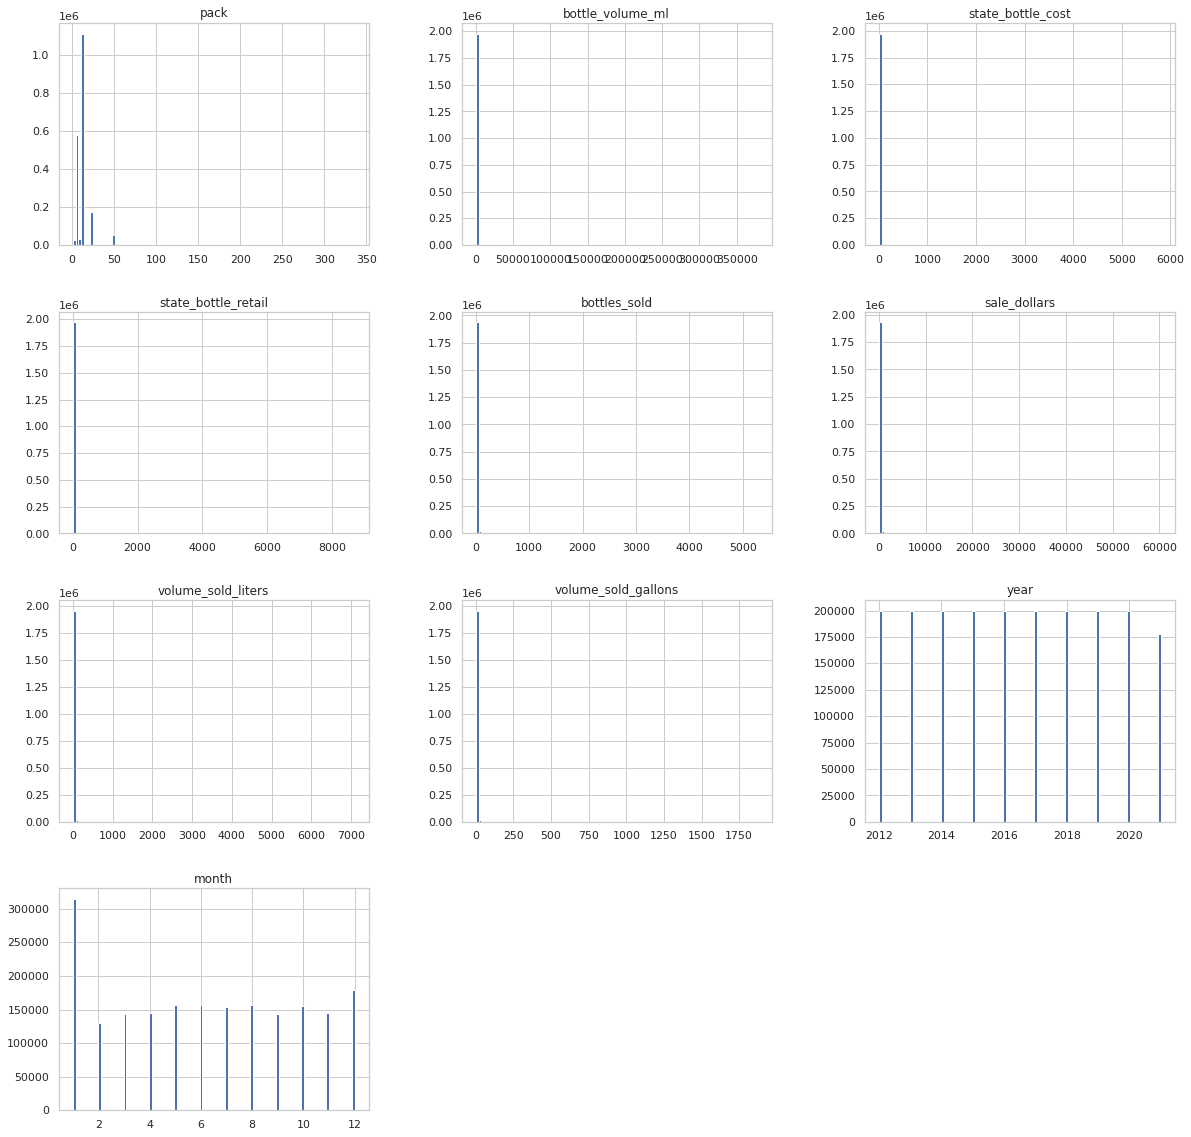

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=100, figsize=(20,20))
plt.show()

In [ ]:
df = df.reset_index()

In [ ]:
df.tail()

,index,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1978057,178057,INV-33875500129,2021-01-29,2624,Hy-Vee #2 / Dubuque,2395 NW Arterial Rd,Dubuque,52002,POINT (-90.741064 42.516633),31,DUBUQUE,1701100,Temporary & Specialty Packages,420,MOET HENNESSY USA,101188,Hennessy V.S.O.P NBA 2020 Giftbox,12,750,30.99,46.49,2,92.98,1.5,0.39
1978058,178058,INV-33788600010,2021-01-26,2660,HY-VEE FOOD STORE / SIOUX CENTER,1951 S Main Ave,Sioux Center,51250,POINT (-96.175695 43.056471),84,SIOUX,1701100,Temporary & Specialty Packages,260,DIAGEO AMERICAS,77903,Smirnoff Peppermint Twist,12,750,8.25,12.38,2,24.76,1.5,0.39
1978059,178059,INV-33519200044,2021-01-15,3403,Econ-o-mart / Columbus Junction,103 Walnut St. E,Columbus Junction,52738,POINT (-91.359363 41.280107),58,LOUISA,1701100,Temporary & Specialty Packages,065,Jim Beam Brands,20920,Old Tub,12,750,11.00,16.50,2,33.00,1.5,0.39
1978060,178060,INV-33557800018,2021-01-18,3805,Washington Street Mini Mart,1601 Washington St,Davenport,52804,POINT (-90.596253 41.535982),82,SCOTT,1701100,Temporary & Specialty Packages,260,DIAGEO AMERICAS,65332,Ciroc White Grape,12,750,16.49,24.74,2,49.48,1.5,0.39
1978061,178061,INV-33248500076,2021-01-06,3704,Celtics Beverage Company,1122 Broadway,Emmetsburg,50536,POINT (-94.678807 43.10937),74,PALO ALTO,1701100,Temporary & Specialty Packages,260,DIAGEO AMERICAS,72911,Captain Morgan Orange Vanilla Twist,12,750,9.06,13.59,2,27.18,1.5,0.39


In [ ]:
del df['index']

In [ ]:
from google.colab import drive
drive.mount('drive',force_remount=True)

df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

Disimpan karena apabila tidak, akan memakan waktu lama untuk meload data dari gbq

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
del df['Unnamed: 0']
df.head()

,invoice_and_item_number,date,store_number,store_name,address,zip_code,store_location,county_number,county,category,vendor_number,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,category_name,vendor_name,city
0,S09349400004,2012-12-06,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,52807,POINT (-90.513769 41.574973),82,Scott,1011500,306,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,12,STRAIGHT RYE WHISKIES,MISSISSIPPI RIVER DISTILLING CO.,DAVENPORT
1,S09502700005,2012-12-17,2604,Hy-Vee Wine and Spirits / Lemars,1201 12TH AVE SW,51031,POINT (-96.18335000000002 42.778257),75,Plymouth,1081700,346,86724,Ole Smoky Apple Pie Moonshine,12,750,15.08,22.62,36,814.32,27.0,7.13,2012,12,DISTILLED SPIRITS SPECIALTY,"OLE SMOKY DISTILLERY, LLC",LEMARS
2,S08968400072,2012-11-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,52804,POINT (-90.611972 41.538207),82,Scott,1011500,306,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,11,STRAIGHT RYE WHISKIES,MISSISSIPPI RIVER DISTILLING CO.,DAVENPORT
3,S08974000005,2012-11-15,3838,Schnucks / Bettendorf,858 MIDDLE RD,52722,POINT (-90.520013 41.539421),48,Iowa,1011500,306,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,11,STRAIGHT RYE WHISKIES,MISSISSIPPI RIVER DISTILLING CO.,BETTENDORF
4,S04572500001,2012-03-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,52804,POINT (-90.611972 41.538207),82,Scott,1701100,192,3310,Jagermeister w/Flask,12,750,11.58,17.37,96,1667.52,72.0,19.02,2012,3,DECANTERS & SPECIALTY PACKAGES,SIDNEY FRANK IMPORTING CO.,DAVENPORT


In [ ]:
df.tail()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1978057,INV-33875500129,2021-01-29,2624,Hy-Vee #2 / Dubuque,2395 NW Arterial Rd,Dubuque,52002,POINT (-90.741064 42.516633),31,DUBUQUE,1701100,Temporary & Specialty Packages,420,MOET HENNESSY USA,101188,Hennessy V.S.O.P NBA 2020 Giftbox,12,750,30.99,46.49,2,92.98,1.5,0.39
1978058,INV-33788600010,2021-01-26,2660,HY-VEE FOOD STORE / SIOUX CENTER,1951 S Main Ave,Sioux Center,51250,POINT (-96.175695 43.056471),84,SIOUX,1701100,Temporary & Specialty Packages,260,DIAGEO AMERICAS,77903,Smirnoff Peppermint Twist,12,750,8.25,12.38,2,24.76,1.5,0.39
1978059,INV-33519200044,2021-01-15,3403,Econ-o-mart / Columbus Junction,103 Walnut St. E,Columbus Junction,52738,POINT (-91.359363 41.280107),58,LOUISA,1701100,Temporary & Specialty Packages,65,Jim Beam Brands,20920,Old Tub,12,750,11.00,16.50,2,33.00,1.5,0.39
1978060,INV-33557800018,2021-01-18,3805,Washington Street Mini Mart,1601 Washington St,Davenport,52804,POINT (-90.596253 41.535982),82,SCOTT,1701100,Temporary & Specialty Packages,260,DIAGEO AMERICAS,65332,Ciroc White Grape,12,750,16.49,24.74,2,49.48,1.5,0.39
1978061,INV-33248500076,2021-01-06,3704,Celtics Beverage Company,1122 Broadway,Emmetsburg,50536,POINT (-94.678807 43.10937),74,PALO ALTO,1701100,Temporary & Specialty Packages,260,DIAGEO AMERICAS,72911,Captain Morgan Orange Vanilla Twist,12,750,9.06,13.59,2,27.18,1.5,0.39


In [ ]:
df['sale_dollars'].sum()

272509382.58000004

In [ ]:
df['sale_dollars'].loc[df['year']==2021].sum()

26154779.849999998

In [ ]:
month = []
year = []
coba = []
for i in df['date']:
  month_n = datetime.datetime.strptime(str(i), "%Y-%m-%d").month
  month.append(month_n)
  year_n = datetime.datetime.strptime(str(i), "%Y-%m-%d").year
  year.append(year_n)

In [ ]:
df['year'] = year
df['month'] = month

In [ ]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month
0,S09349400004,2012-12-06,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,DAVENPORT,52807,POINT (-90.513769 41.574973),82,Scott,1011500,STRAIGHT RYE WHISKIES,306,Mississippi River Distilling Co.,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,12
1,S09502700005,2012-12-17,2604,Hy-Vee Wine and Spirits / Lemars,1201 12TH AVE SW,LEMARS,51031,POINT (-96.18335000000002 42.778257),75,Plymouth,1081700,DISTILLED SPIRITS SPECIALTY,346,"Ole Smoky Distillery, LLC",86724,Ole Smoky Apple Pie Moonshine,12,750,15.08,22.62,36,814.32,27.0,7.13,2012,12
2,S08968400072,2012-11-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,POINT (-90.611972 41.538207),82,Scott,1011500,STRAIGHT RYE WHISKIES,306,Mississippi River Distilling Co.,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,11
3,S08974000005,2012-11-15,3838,Schnucks / Bettendorf,858 MIDDLE RD,BETTENDORF,52722,POINT (-90.520013 41.539421),48,Iowa,1011500,STRAIGHT RYE WHISKIES,306,Mississippi River Distilling Co.,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,11
4,S04572500001,2012-03-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,POINT (-90.611972 41.538207),82,Scott,1701100,DECANTERS & SPECIALTY PACKAGES,192,Sidney Frank Importing Co.,3310,Jagermeister w/Flask,12,750,11.58,17.37,96,1667.52,72.0,19.02,2012,3


In [ ]:
from collections import Counter
print(Counter(df['year']))

Counter({2012: 200000, 2013: 200000, 2014: 200000, 2015: 200000, 2016: 200000, 2017: 200000, 2018: 200000, 2019: 200000, 2020: 200000, 2021: 178062})


Sebagai produsen, insight yang diperlukan:
1. Mengetahui revenue total

a. 2012-2021 per bulan

In [ ]:
import seaborn as sns

In [ ]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

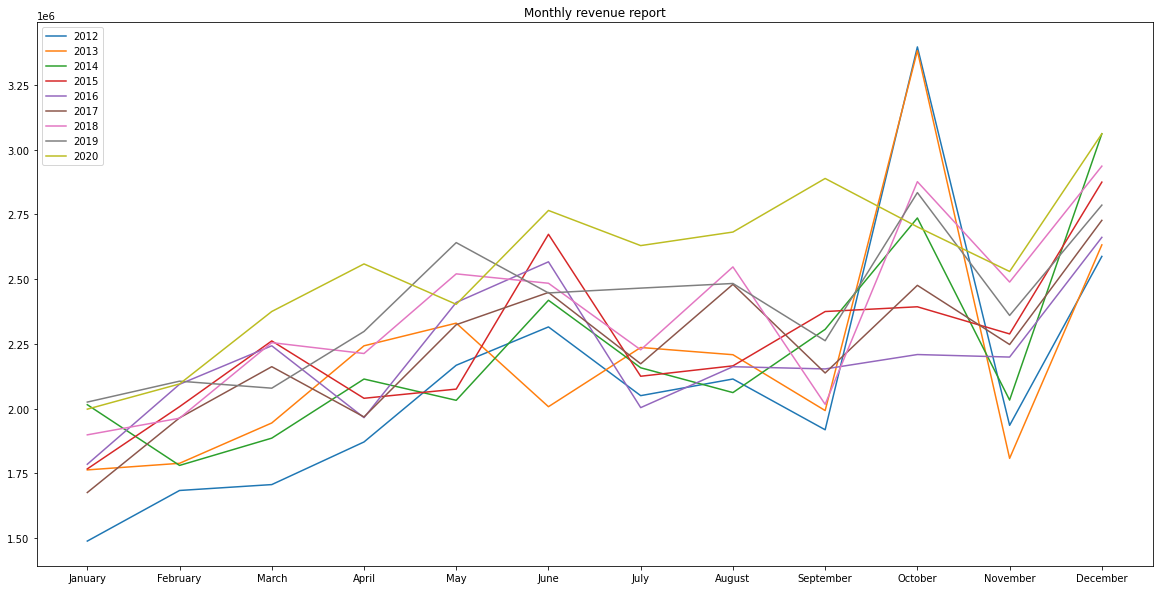

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Monthly revenue report')
for year in df['year'].unique()[:-1]:
  tot_revenue = []
  #f, axes = plt.subplots(ncols=1, figsize=(15,4))
  for i in range(1,13):
    tot_revenue.append(df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)].sum())
  #sns.set_theme(style="whitegrid")
  #sns.lineplot(x=month, y=tot_revenue).set_title(str(year))
  plt.plot(month, tot_revenue, label = str(year)) 
plt.legend() 
plt.show()

Text(0.5, 1.0, 'Monthly Revenue Since 2012 Until January 2021')

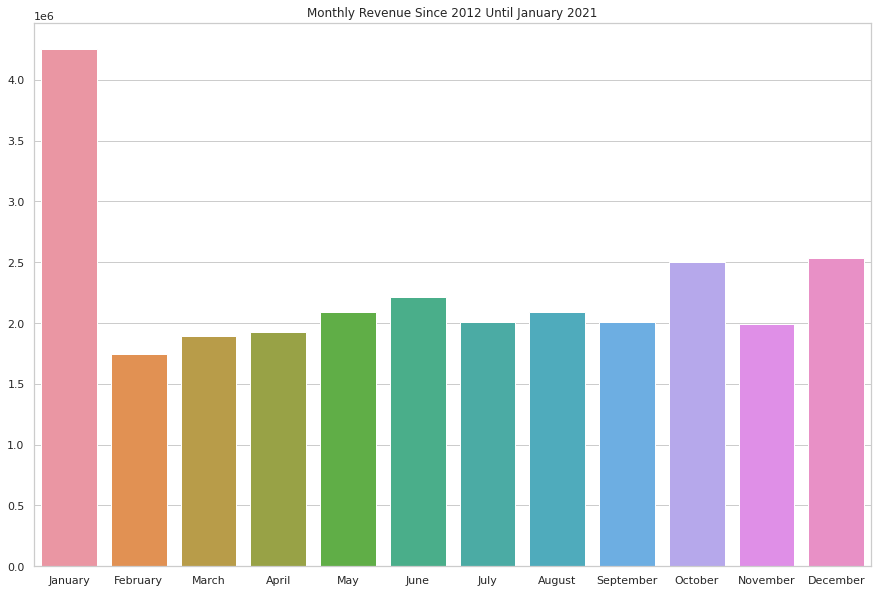

In [ ]:
tot_revenue_month = []
for i in range(1,13):
  tot = 0
  for year in df['year'].unique():
    if df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)].sum() is not np.nan:
      tot = tot+df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)].sum()
  tot_revenue_month.append(tot/len(df['year'].unique()))

sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style="whitegrid")
sns.barplot(x=month, y=tot_revenue_month).set_title('Monthly Revenue Since 2012 Until January 2021')

Text(0.5, 1.0, 'Monthly Revenue Since 2012 Until Dec 2020')

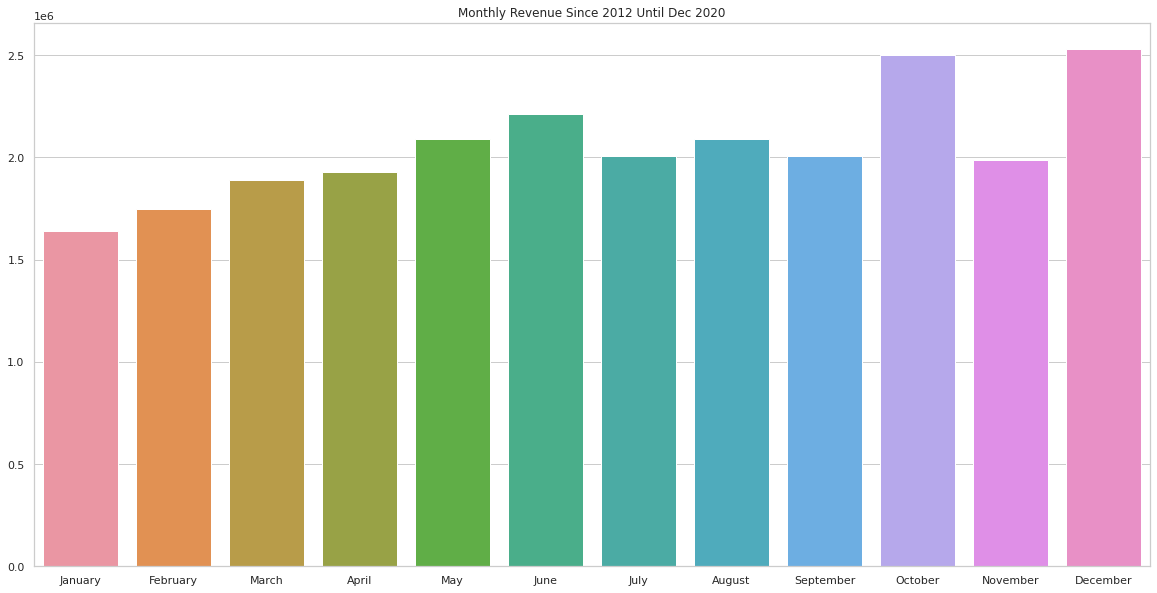

In [ ]:
tot_revenue_month = []
for i in range(1,13):
  tot = 0
  for year in df['year'].unique()[:-1]:
    if df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)].sum() is not np.nan:
      tot = tot+df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)].sum()
  tot_revenue_month.append(tot/len(df['year'].unique()))

sns.set_theme(style="whitegrid")
sns.barplot(x=month, y=tot_revenue_month).set_title('Monthly Revenue Since 2012 Until Dec 2020')

Kita dapat melihat, hampir setiap Desember memiliki revenue tertinggi

B. Jumlah pemasukan setiap tahunnya

Text(0.5, 1.0, 'Anual Revenue Since 2012 Until January 2021')

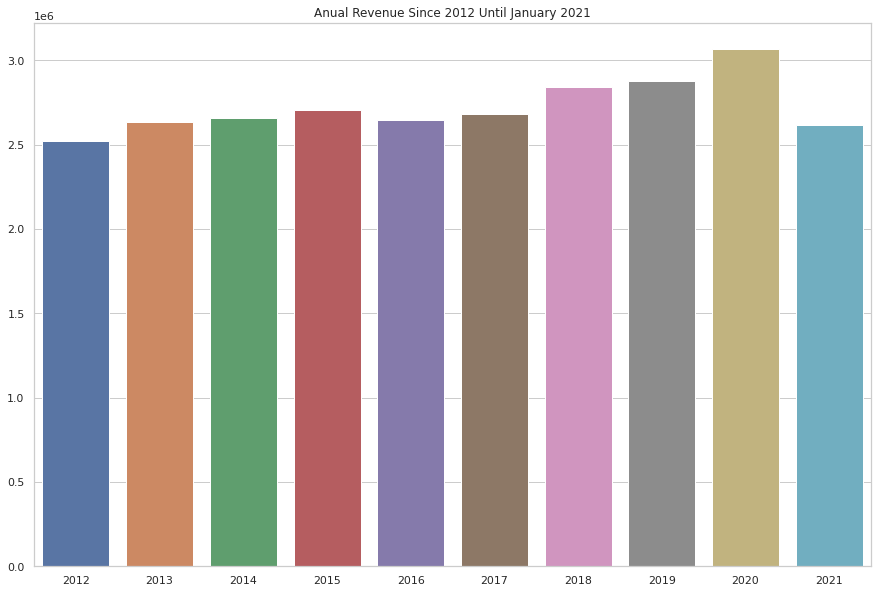

In [ ]:
tot_revenue_anual = []
f, axes = plt.subplots(ncols=1, figsize=(15,10))
for year in df['year'].unique():
  tot = 0
  for i in range(1,13):
    if df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)].sum() is not np.nan:
      tot = tot+df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)].sum()
  tot_revenue_anual.append(tot/len(df['year'].unique()))

sns.set_theme(style="whitegrid")
sns.barplot(x=df['year'].unique(), y=tot_revenue_anual).set_title('Anual Revenue Since 2012 Until January 2021')

Tren rata rata revenue selalu naik setiap taunnya, yang mengejutkan baru bulan januari 2021, angka pemasukan sudah diatas 75% dari tahun sebelumnya 

  2. Jumlah Profit 

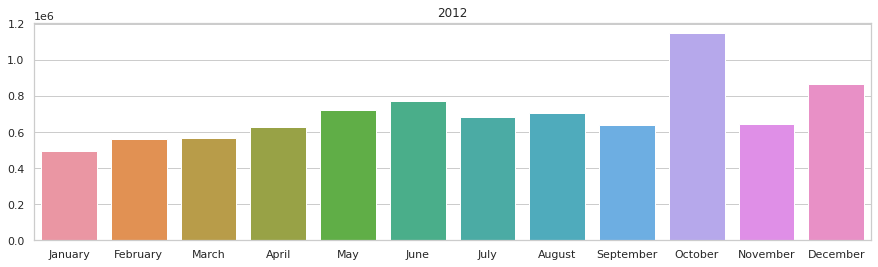

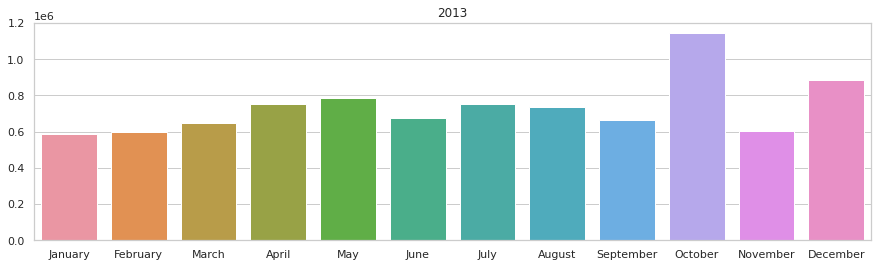

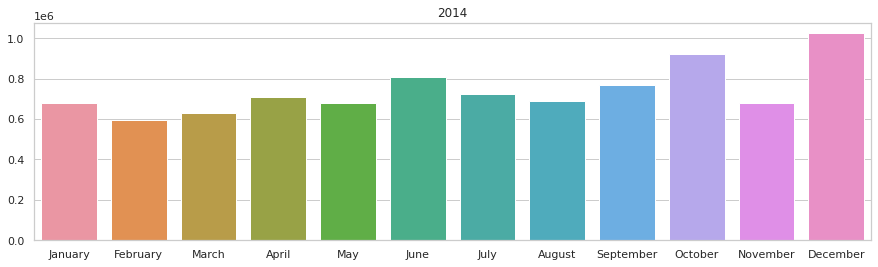

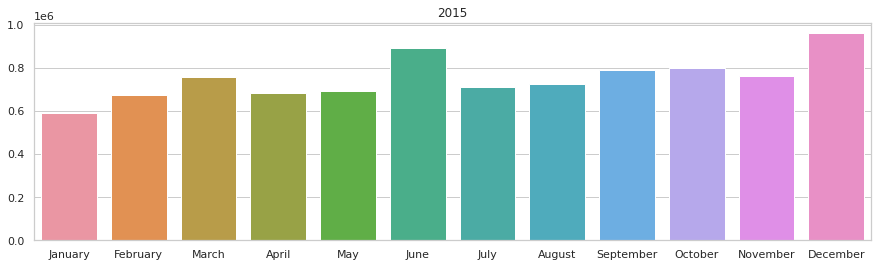

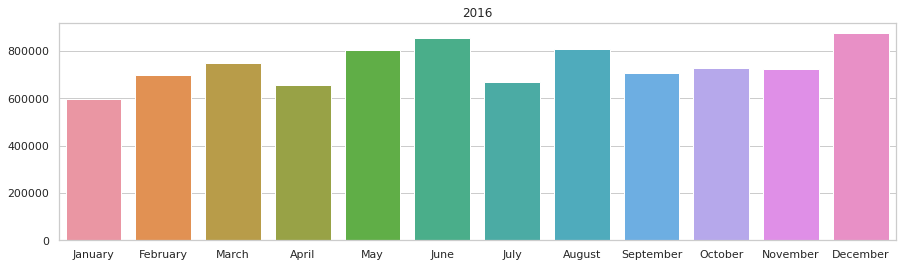

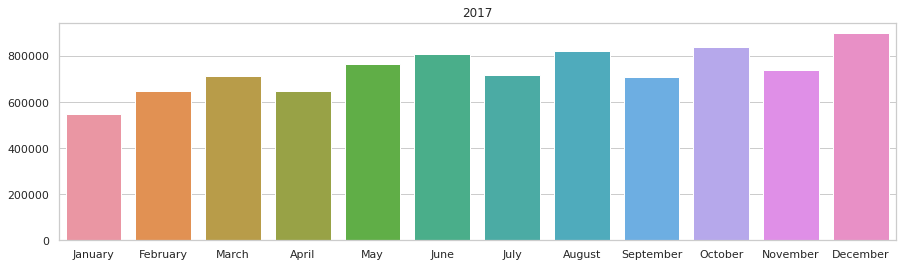

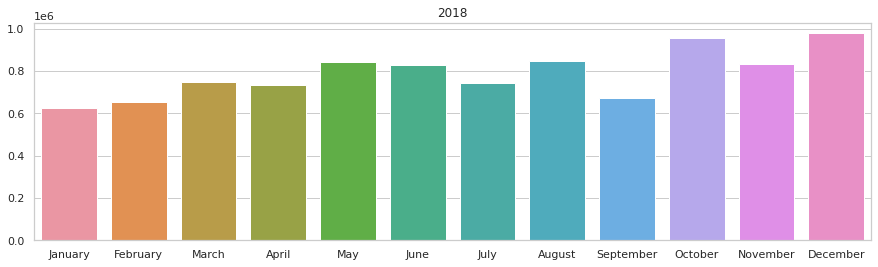

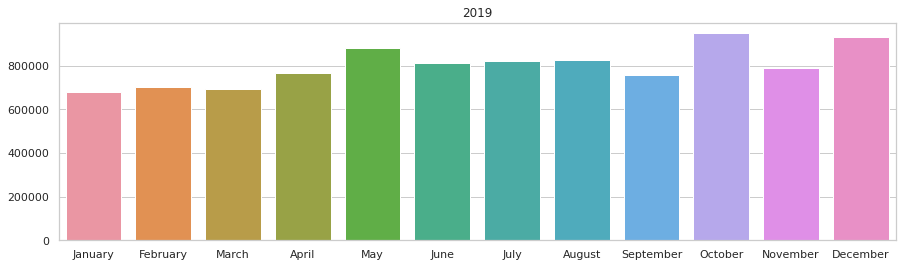

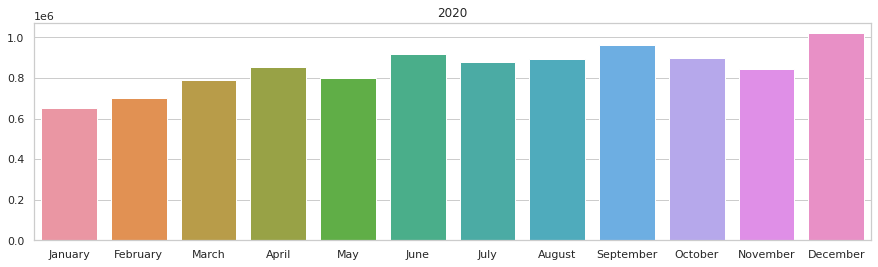

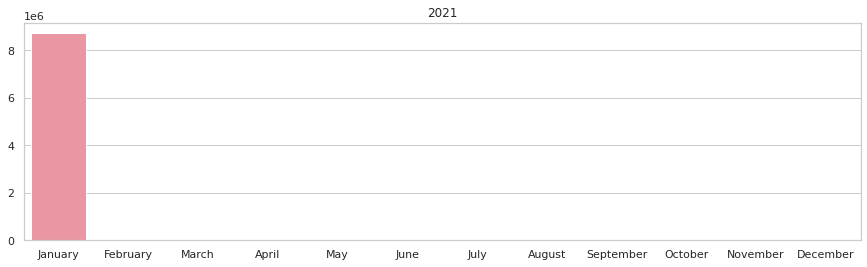

In [ ]:
for year in df['year'].unique():
  tot_profit = []
  f, axes = plt.subplots(ncols=1, figsize=(15,4))
  for i in range(1,13):
    tot_profit.append(((df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)])-(df['state_bottle_cost'].loc[(df['year']==year)&(df['month']==i)]*df['bottles_sold'].loc[(df['year']==year)&(df['month']==i)])).sum())
  sns.set_theme(style="whitegrid")
  sns.barplot(x=month, y=tot_profit).set_title(str(year))

Text(0.5, 1.0, 'Monthly Profit Since 2012 Until January 2021')

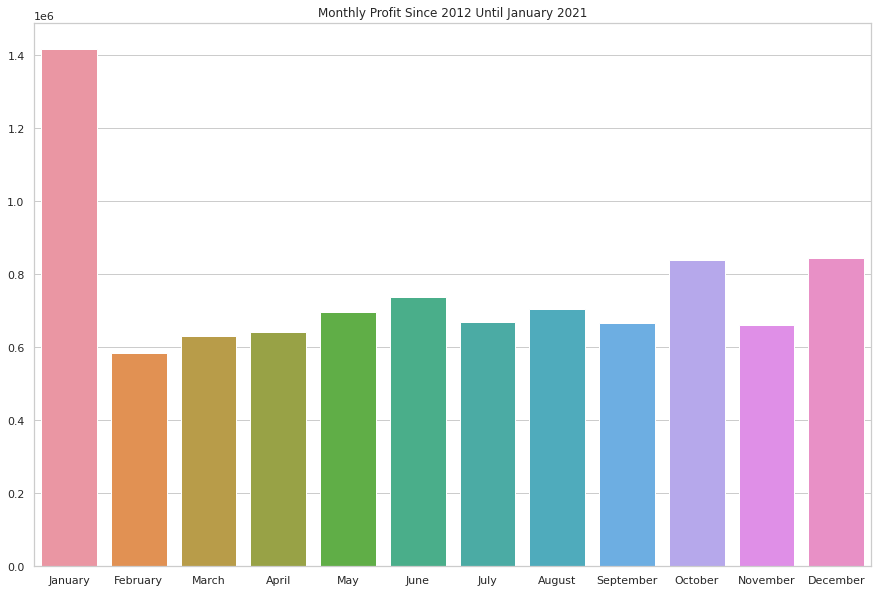

In [ ]:
tot_profit_month = []
for i in range(1,13):
  tot = 0
  for year in df['year'].unique():
    if ((df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)])-(df['state_bottle_cost'].loc[(df['year']==year)&(df['month']==i)]*df['bottles_sold'].loc[(df['year']==year)&(df['month']==i)])).sum() is not np.nan:
      tot = tot+((df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)])-(df['state_bottle_cost'].loc[(df['year']==year)&(df['month']==i)]*df['bottles_sold'].loc[(df['year']==year)&(df['month']==i)])).sum()
  tot_profit_month.append(tot/len(df['year'].unique()))

sns.set_theme(style="whitegrid")
sns.barplot(x=month, y=tot_profit_month).set_title('Monthly Profit Since 2012 Until January 2021')

Text(0.5, 1.0, 'Monthly Profit Since 2012 Until December 2020')

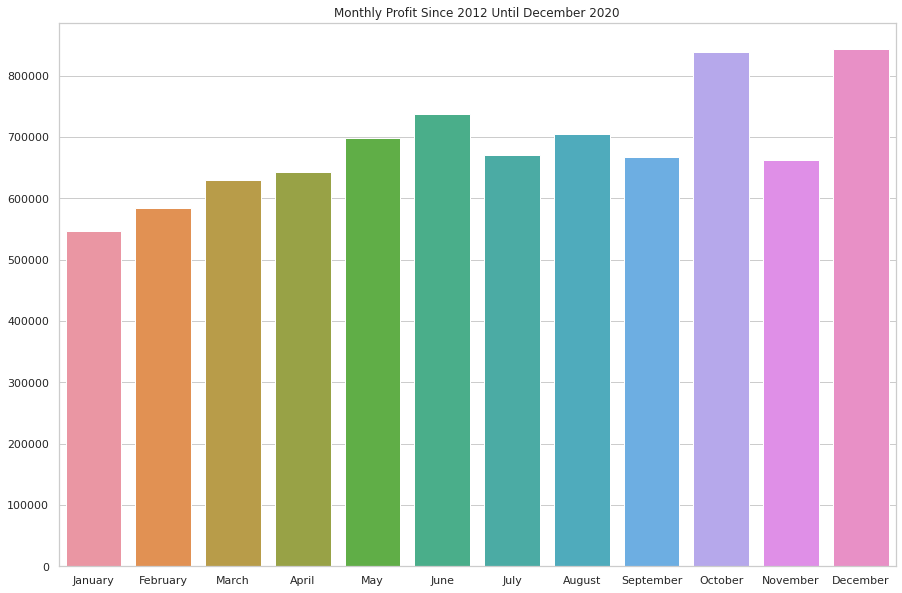

In [ ]:
tot_profit_month = []
for i in range(1,13):
  tot = 0
  for year in df['year'].unique()[:-1]:
    if ((df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)])-(df['state_bottle_cost'].loc[(df['year']==year)&(df['month']==i)]*df['bottles_sold'].loc[(df['year']==year)&(df['month']==i)])).sum() is not np.nan:
      tot = tot+((df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)])-(df['state_bottle_cost'].loc[(df['year']==year)&(df['month']==i)]*df['bottles_sold'].loc[(df['year']==year)&(df['month']==i)])).sum()
  tot_profit_month.append(tot/len(df['year'].unique()))

sns.set_theme(style="whitegrid")
sns.barplot(x=month, y=tot_profit_month).set_title('Monthly Profit Since 2012 Until December 2020')

Desember dan Oktober memiliki total profit yang sama

Text(0.5, 1.0, 'Anual Profit Since 2012 Until January 2021')

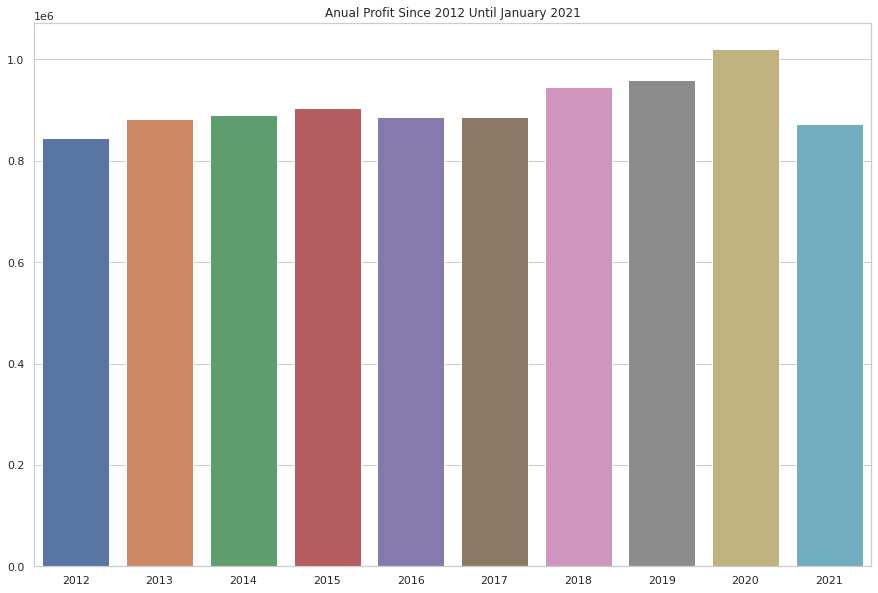

In [ ]:
tot_profit_anual = []
for year in df['year'].unique():
  tot = 0
  for i in range(1,13):
    if ((df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)])-(df['state_bottle_cost'].loc[(df['year']==year)&(df['month']==i)]*df['bottles_sold'].loc[(df['year']==year)&(df['month']==i)])).sum() is not np.nan:
      tot = tot+((df['sale_dollars'].loc[(df['year']==year)&(df['month']==i)])-(df['state_bottle_cost'].loc[(df['year']==year)&(df['month']==i)]*df['bottles_sold'].loc[(df['year']==year)&(df['month']==i)])).sum()
  tot_profit_anual.append(tot/len(df['year'].unique()))

sns.set_theme(style="whitegrid")
sns.barplot(x=df['year'].unique(), y=tot_profit_anual).set_title('Anual Profit Since 2012 Until January 2021')

Selaras dengan pemasukan, begitupula profit pada tiap tahunnya meningkat. Profit bulan Januari sudah melebihi 75% profit tahun lalu. Tahun ini diprediksi akan menjadi tahun dengan pemasukan terbesar.

Kegunaan dari data pemasukan dan profit adalah untuk menunjukkan perkembangan setiap tahunnya. Dengan ini, perusahaan dapat menentukkan pilihan untuk mengembangkan perusahaannya. 

Salah satunya menentukkan penyediaan lebih banyak liquor yang memiliki tingkat penjualan terbesar

1. Kategori liquor yang sering diorder

Kita akan gunakan chart 10 liquor paling laku saja

In [ ]:
from heapq import nlargest 

Sepertinya terdapat data yang memiliki nama yang sama namun memiliki huruf besar kecil yang berbeda, karena Python case sensitive maka kita harus mengubah ke Upper Case

In [ ]:
oldcatname = list(df['category_name'].values)
newcatname = [i.upper() for i in oldcatname]
del df['category_name']
df['category_name'] = newcatname

In [ ]:
oldvenname = list(df['vendor_name'].values)
newvenname = [i.upper() for i in oldvenname]
del df['vendor_name']
df['vendor_name'] = newvenname

In [ ]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,vendor_number,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,category_name,vendor_name
0,S09349400004,2012-12-06,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,DAVENPORT,52807,POINT (-90.513769 41.574973),82,Scott,1011500,306,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,12,STRAIGHT RYE WHISKIES,MISSISSIPPI RIVER DISTILLING CO.
1,S09502700005,2012-12-17,2604,Hy-Vee Wine and Spirits / Lemars,1201 12TH AVE SW,LEMARS,51031,POINT (-96.18335000000002 42.778257),75,Plymouth,1081700,346,86724,Ole Smoky Apple Pie Moonshine,12,750,15.08,22.62,36,814.32,27.0,7.13,2012,12,DISTILLED SPIRITS SPECIALTY,"OLE SMOKY DISTILLERY, LLC"
2,S08968400072,2012-11-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,POINT (-90.611972 41.538207),82,Scott,1011500,306,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,11,STRAIGHT RYE WHISKIES,MISSISSIPPI RIVER DISTILLING CO.
3,S08974000005,2012-11-15,3838,Schnucks / Bettendorf,858 MIDDLE RD,BETTENDORF,52722,POINT (-90.520013 41.539421),48,Iowa,1011500,306,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,11,STRAIGHT RYE WHISKIES,MISSISSIPPI RIVER DISTILLING CO.
4,S04572500001,2012-03-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,POINT (-90.611972 41.538207),82,Scott,1701100,192,3310,Jagermeister w/Flask,12,750,11.58,17.37,96,1667.52,72.0,19.02,2012,3,DECANTERS & SPECIALTY PACKAGES,SIDNEY FRANK IMPORTING CO.


([<matplotlib.patches.Wedge at 0x7fbc48977c50>,
 [Text(0.8687214676138519, 0.6747762678894651, 'AMERICAN VODKAS'),
  Text(-0.2526324144656251, 1.0705964987619139, 'VODKA 80 PROOF'),
  Text(-0.9953091209985543, 0.46835857380546086, 'SPICED RUM'),
  Text(-1.0426805642063257, -0.35045290842904797, 'WHISKEY LIQUEUR'),
  Text(-0.594561366610075, -0.9254711131822323, 'BLENDED WHISKIES'),
  Text(-0.02888047934989717, -1.0996208064203408, 'FLAVORED RUM'),
  Text(0.40798880177172697, -1.0215405707209433, 'VODKA FLAVORED'),
  Text(0.7503930988713752, -0.8043072778274574, 'CREAM LIQUEURS'),
  Text(0.9788302298914244, -0.5018878171969323, 'TEQUILA'),
  Text(1.0869921432443135, -0.16866558785103203, 'IMPORTED VODKA')],
 [Text(0.4738480732439192, 0.36805978248516275, '21%'),
  Text(-0.13779949879943187, 0.5839617265974075, '15%'),
  Text(-0.5428958841810295, 0.2554683129847968, '13%'),
  Text(-0.5687348532034503, -0.19115613187038977, '11%'),
  Text(-0.32430619996913174, -0.5048024253721267, '10%'),

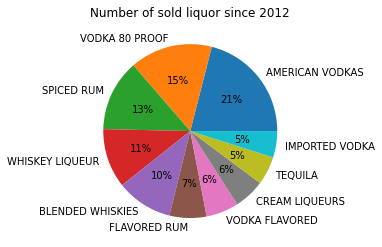

In [ ]:
counts = Counter(df['category_name'])
c = dict(counts)
TenHighest = nlargest(10, c, key = c.get)
va = []
for val in TenHighest: 
  va.append(c.get(val))

plt.title('Number of sold liquor since 2012')
plt.pie([float(v) for v in va], labels=[k for k in TenHighest],
           autopct='%1.0f%%')

In [ ]:
!pip install -U kaleido

4/1AY0e-g5xFObtGNav3lPtZl0OnHxuACltkuocWN1On0HHB3dP2PNA2WCr2bcCollecting kaleido
     |████████████████████████████████| 74.6MB 70kB/s 


In [ ]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
import plotly.express as px

In [ ]:
df_chart = pd.DataFrame(c.items(), columns=['Item', 'Count'])
fig = px.pie(df_chart, values='Count', names='Item', title='TOTAL NUMBER LIQUOR SALES')
fig.update_traces(textposition='inside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
fig.write_image("fig1.png")

Mungkin kita harus membeli 'American Vodkas' atau 'VODKA 80 PROOF' yang cukup populer ini

2. Vendor liquor yang sering diorder

([<matplotlib.patches.Wedge at 0x7fbc440dfb38>,
 [Text(0.6796451222103075, 0.8649176306768965, 'DIAGEO AMERICAS'),
  Text(-0.5916709257175853, 0.9273216894155425, 'JIM BEAM BRANDS'),
  Text(-1.0157221739527542, 0.42226587044265274, 'SAZERAC COMPANY  INC'),
  Text(-1.0865504965516979, -0.17148766265611998, 'LUXCO-ST LOUIS'),
  Text(-0.8474658596120759, -0.7012856884265966, 'LUXCO INC'),
  Text(-0.40403145690486336, -1.0231122039304066, 'SAZERAC NORTH AMERICA'),
  Text(0.10186508178625468, -1.0952732559104508, 'HEAVEN HILL BRANDS'),
  Text(0.574688435001741, -0.9379409377328883, 'PROXIMO'),
  Text(0.9138486472913897, -0.6122749789463044, 'PERNOD RICARD USA'),
  Text(1.0794587856408582, -0.2115862238019392, 'PERNOD RICARD USA/AUSTIN NICHOLS')],
 [Text(0.37071552120562223, 0.471773253096489, '29%'),
  Text(-0.32272959584595556, 0.5058118305902959, '10%'),
  Text(-0.5540302767015022, 0.2303268384232651, '9%'),
  Text(-0.5926639072100169, -0.09353872508515634, '9%'),
  Text(-0.46225410524295

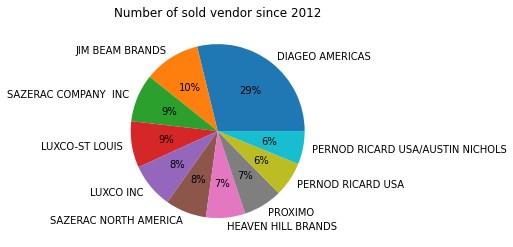

In [ ]:
counts = Counter(df['vendor_name'])
c = dict(counts)
TenHighest = nlargest(10, c, key = c.get)
va = []
for val in TenHighest: 
  va.append(c.get(val))
plt.title('Number of sold vendor since 2012')
plt.pie([float(v) for v in va], labels=[k for k in TenHighest],
           autopct='%1.0f%%')

In [ ]:
df_chart = pd.DataFrame(c.items(), columns=['Item', 'Count'])
fig = px.pie(df_chart, values='Count', names='Item', title='NUMBER OF LIQUOR VENDORS TRANSACTION')
fig.update_traces(textposition='inside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
fig.write_image("fig2.png")

Walaupun sekilas ada yang memiliki nama yang sama namun kami tidak dapat memastikan mereka adalah vendor yang sama karena kurangnya informasi

Namun, kami tetap dapat menentukan bahwa Diego Americas adalah vendor dengan penjualan terbanyak. Mungkin alangkah baiknya apabila menjalin hubungan yang baik dengan Diego Americas.

Selanjutnya, bagaimana keterkaitan semua data terhadap pemasukan?

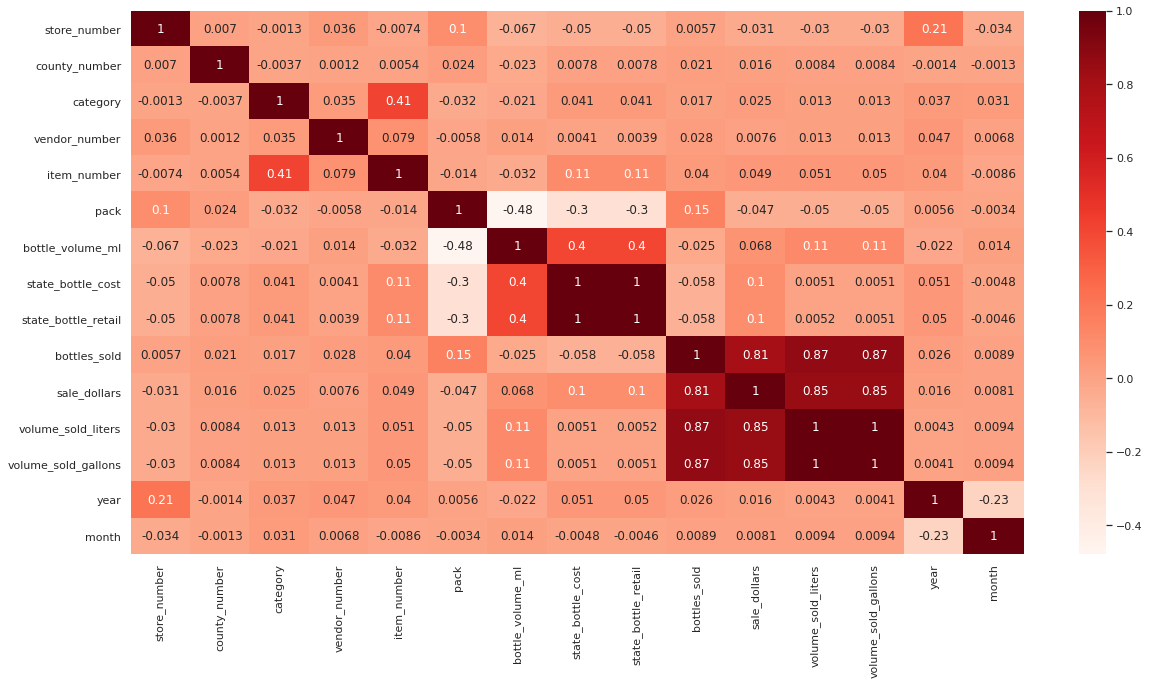

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True,cmap="Reds")

Ternyata data pemasukan memiliki keterkaitan data tinggi dengan penjualan liquor dalam liter dan galon, dan banyaknya botol yang terjual. Semakin ketiga faktor itu memiliki nilai yang tinggi, pemasukan akan naik. Hal itu sangat logis. Maka dari itu, kita harus jual sebanyak banyaknya.

Faktor selain dari segi barang, kita juga dapat mengembangkan bisinis dari sektor performa toko

1. Toko paling banyak melakukan order

Kita akan menggunakan kode toko karena memiliki nilai yang unik terhadap toko tersebut dan tidak perlu khawatir terhadap case sensitive

([<matplotlib.patches.Wedge at 0x7fbc45d56390>,
 [Text(1.0048223571213817, 0.4475846630851314, 'Hy Vee BDI Des Moines'),
  Text(0.40434335651778014, 1.0229889784547708, 'Central City'),
  Text(-0.35054638085157563, 1.0426491427473876, 'Central City Liquor Inc'),
  Text(-0.9256137885013204, 0.594339225136818, 'Hy Vee Wine and Spirits Iowa City'),
  Text(-1.0981180471313385, -0.06431760695529197, 'Hy Vee Food and Drugstore Hy Vee Food Drugstore Davenport'),
  Text(-0.8788200736027065, -0.6615703123878323, 'Hy Vee Food Store Cedar Falls'),
  Text(-0.38158975588568034, -1.0316924242249272, 'Hy Vee Food Store Mason City'),
  Text(0.22953817968693652, -1.0757844691507716, 'Hy Vee Wine and Spirits Bettendorf'),
  Text(0.7625037921750546, -0.7928353971151018, 'Hy Vee WDM Hy Vee Wdm'),
  Text(1.0614408813131013, -0.28869231974070086, 'Hy Vee Cedar Rapids Hy Vee Hy Vee Edgewood Cedar Rapids')],
 [Text(0.5480849220662082, 0.24413708895552616, '13%'),
  Text(0.22055092173697097, 0.5579939882480568

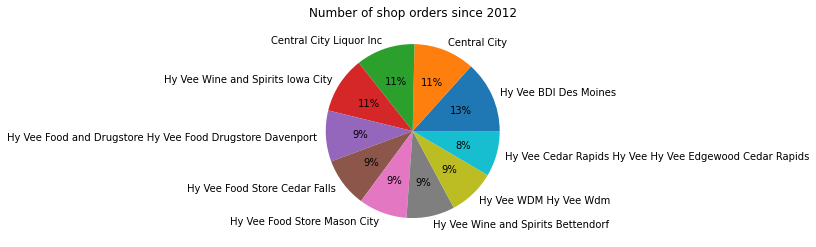

In [ ]:
counts = Counter(df['store_number'])
c = dict(counts)
TenHighest = nlargest(10, c, key = c.get)
va = []
for val in TenHighest: 
  va.append(c.get(val))
store_name = []
for i in TenHighest:
  st_name = " ".join(re.findall("[a-zA-Z]+",str(df['store_name'].loc[df['store_number']==i].unique())))
  store_name.append(st_name)

plt.title('Number of shop orders since 2012')
plt.pie([float(v) for v in va], labels=[k for k in store_name],
           autopct='%1.0f%%')

<Figure size 1080x1080 with 0 Axes>

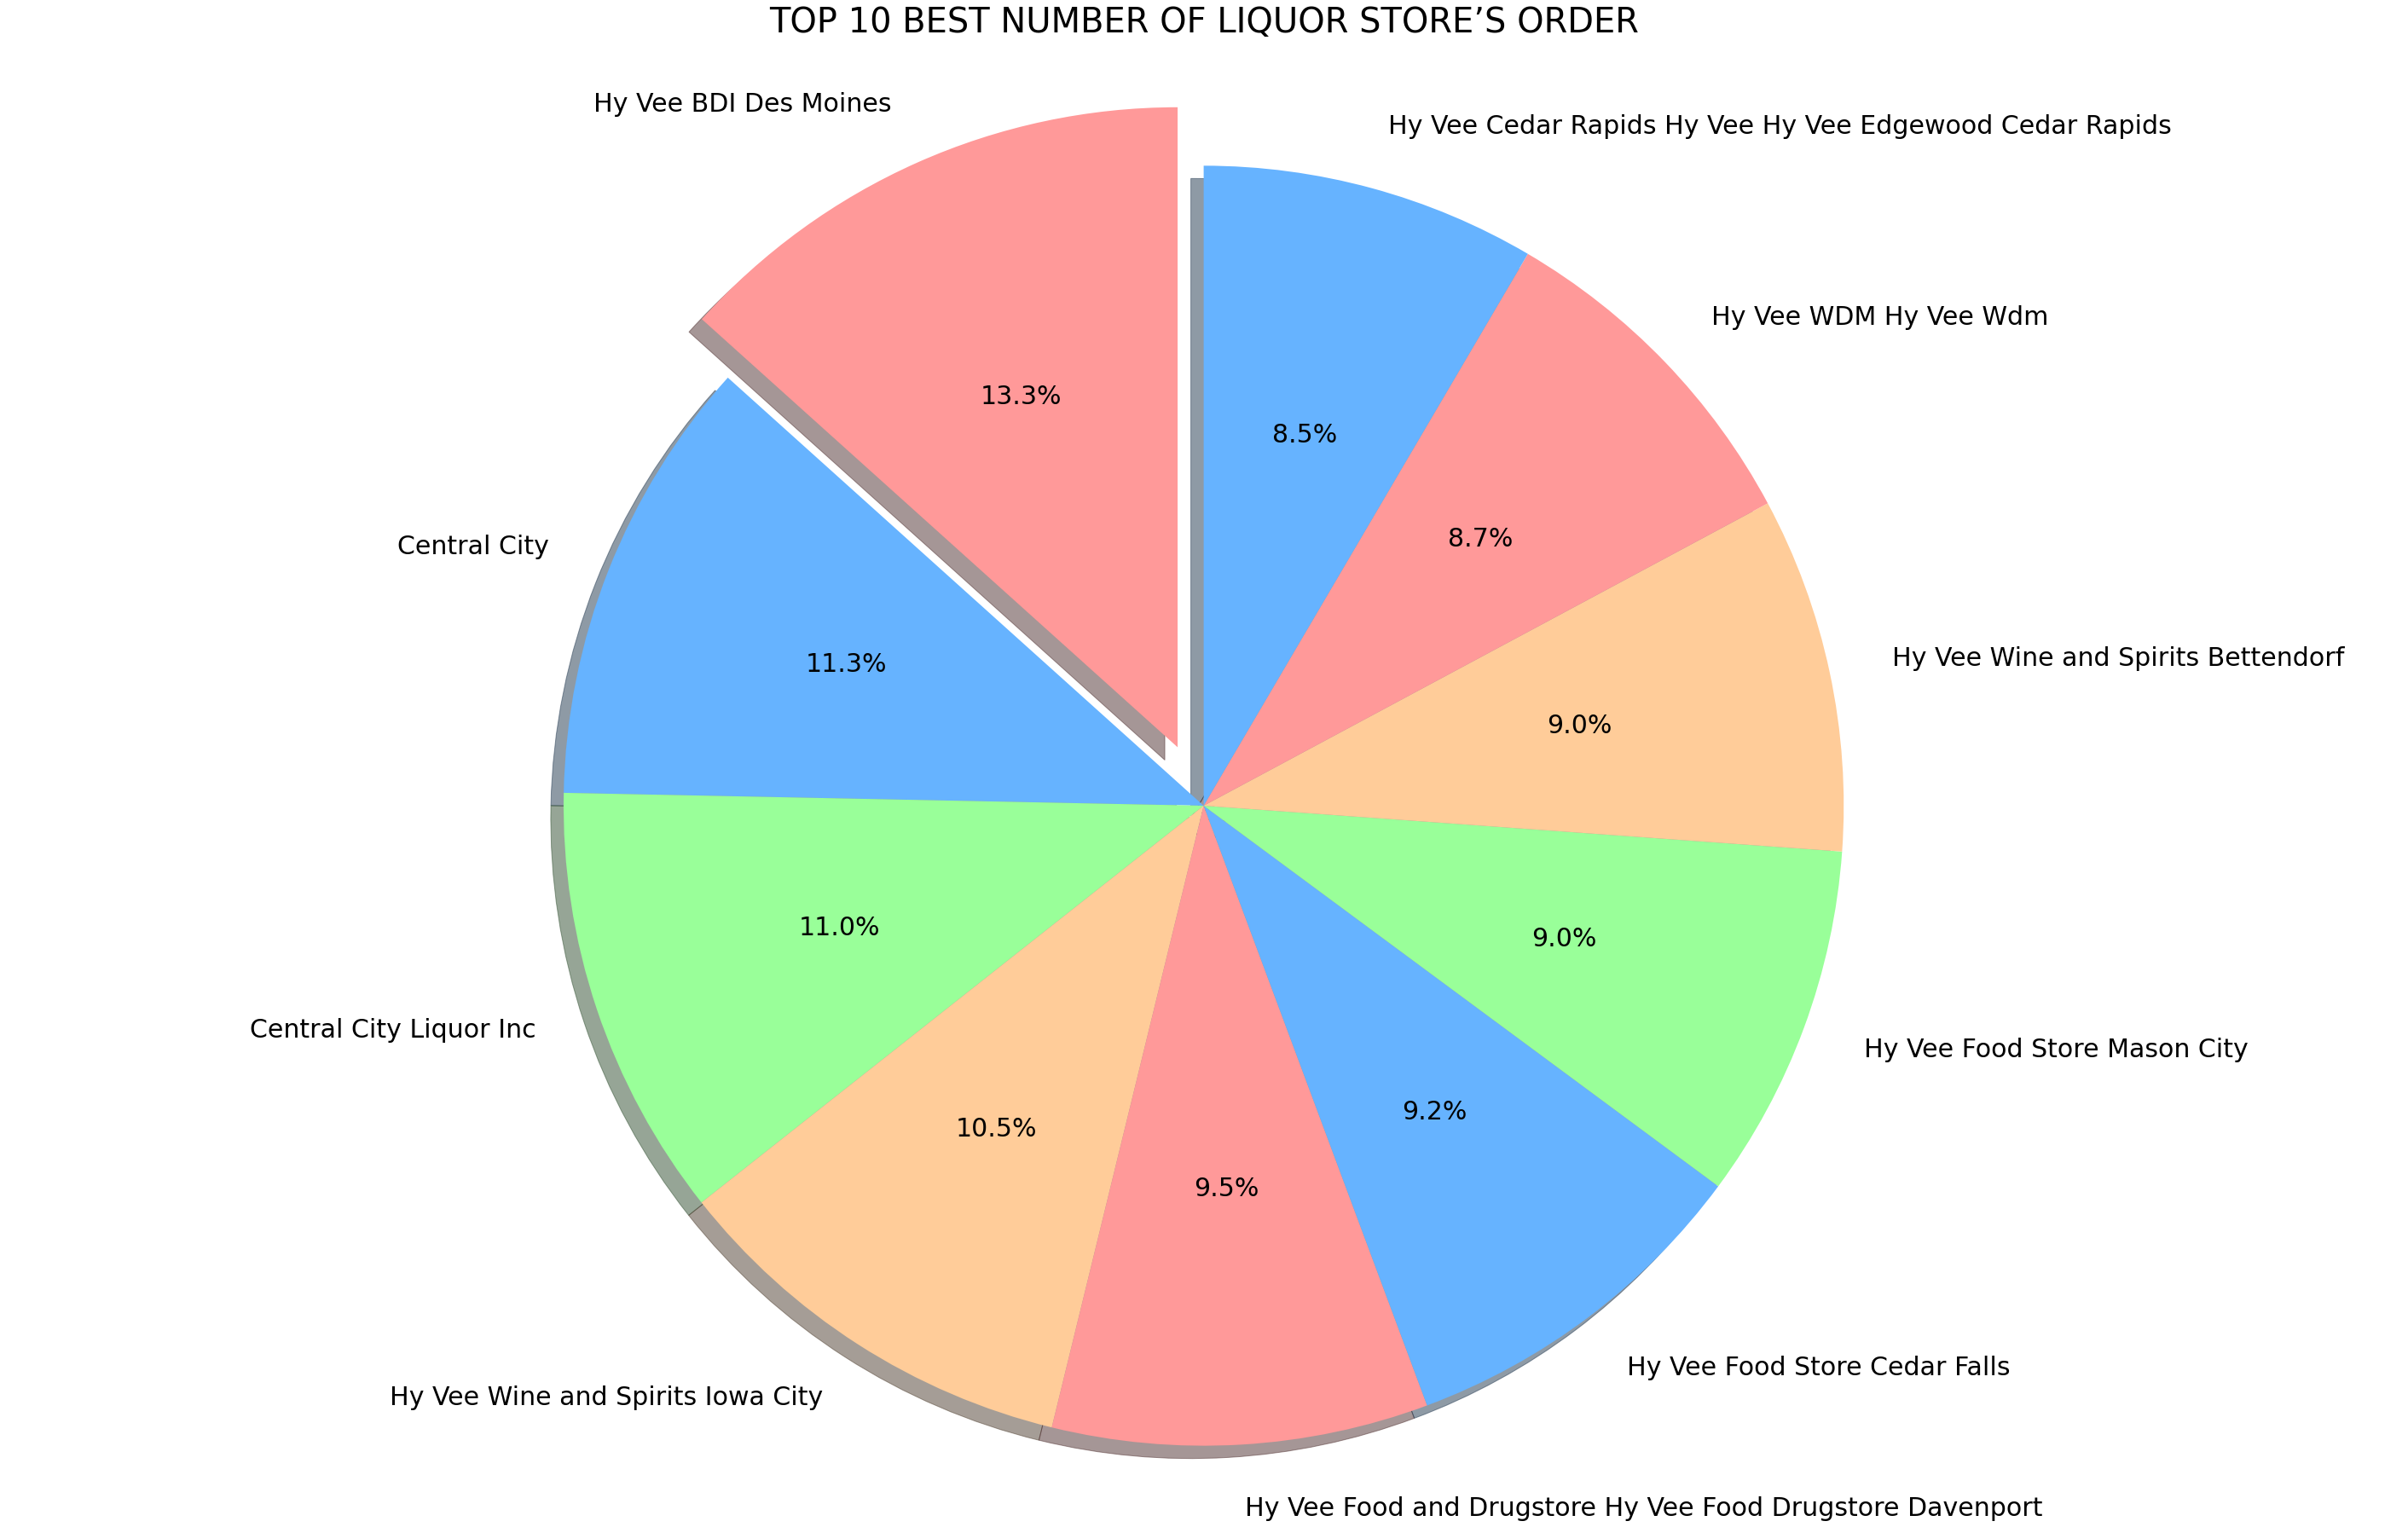

In [ ]:
plt.figure(figsize=(15,15))
explode = (0.1,0,0,0,0,0,0,0,0,0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots(figsize=(40,25))
patches, texts, autotexts = ax1.pie(va, explode=explode, labels=store_name, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('TOP 10 BEST NUMBER OF LIQUOR STORE’S ORDER',fontsize=40)
for i in range(len(texts)):
  texts[i].set_fontsize(30)
  autotexts[i].set_fontsize(30)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
df_chart = pd.DataFrame.from_dict(Counter(df['store_name']), orient='index', columns=['cnt']).reset_index()

In [ ]:
df_chart = df_chart.sort_values(by=['cnt'],ascending=False)

In [ ]:
df_chart = df_chart.reset_index()

In [ ]:
del df_chart['level_0']

In [ ]:
df_chart.head()

,index,cnt
0,Hy-Vee #3 / BDI / Des Moines,16102
1,Central City 2,13690
2,"Central City Liquor, Inc.",13236
3,Hy-Vee Wine and Spirits / Iowa City,12726
4,Hy-Vee Food Store / Cedar Falls,11092


In [ ]:
store_name = []
for i in df_chart['index']:
  st_name = " ".join(re.findall("[a-zA-Z]+",str(i)))
  store_name.append(st_name)

In [ ]:
store_name[0:5]

['Hy Vee BDI Des Moines',
 'Central City',
 'Central City Liquor Inc',
 'Hy Vee Wine and Spirits Iowa City',
 'Hy Vee Food Store Cedar Falls']

In [ ]:
df_chart['index'] = store_name
df_chart.head()

,index,cnt
0,Hy Vee BDI Des Moines,16102
1,Central City,13690
2,Central City Liquor Inc,13236
3,Hy Vee Wine and Spirits Iowa City,12726
4,Hy Vee Food Store Cedar Falls,11092


In [ ]:
df_chart['cnt'].max()

16102

In [ ]:
df_chart.loc[df_chart['cnt']>16102]

,index,cnt


In [ ]:
df_chart.loc[df_chart['index']=='Hy Vee Food Store Cedar Rapids']

,index,cnt
9,Hy Vee Food Store Cedar Rapids,9675
15,Hy Vee Food Store Cedar Rapids,8831
46,Hy Vee Food Store Cedar Rapids,6519
55,Hy Vee Food Store Cedar Rapids,5918
143,Hy Vee Food Store Cedar Rapids,2997


In [ ]:
df_chart.iloc[[9,15,46,55,143],:]

,index,cnt
9,Hy-Vee Food Store #5 / Cedar Rapids,9675
15,Hy-Vee Food Store #3 / Cedar Rapids,8831
46,Hy-Vee Food Store #1 / Cedar Rapids,6519
55,Hy-Vee Food Store #2 / Cedar Rapids,5918
143,Hy-Vee Food Store #4 / Cedar Rapids,2997


Kita tidak bisa menghilangkan non alphabet pada nama toko

In [ ]:
fig = px.pie(df_chart, values='cnt', names='index',title='NUMBER OF LIQUOR STORE’S ORDER')
fig.update_traces(textposition='inside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
fig.write_image("fig6.png")

Hy Vee BDI Des Moines merupakan toko paling setia dengan order terbanyak sejak 2012

Bagaimana dengan toko yang memberi pemasukan terbanyak untuk kami?

([<matplotlib.patches.Wedge at 0x7f64386bbf60>,
 [Text(0.8338414410061136, 0.7174318443314657, 'Hy Vee BDI Des Moines'),
  Text(-0.47442322290943834, 0.9924326705445672, 'Central City'),
  Text(-1.0755067327245045, 0.23083601942561227, 'Hy Vee Wine and Spirits Iowa City'),
  Text(-1.0139176575347666, -0.4265805712162853, 'Sam s Club Cedar Rapids'),
  Text(-0.6438107617292852, -0.89191238531683, 'Costco Wholesale Costco Wholesale WDM'),
  Text(-0.15226614911919498, -1.089410400093744, 'Sam s Club Windsor Heights'),
  Text(0.32473544980470775, -1.0509742564117042, 'Lot A Spirits'),
  Text(0.7168341914992776, -0.8343552851738743, 'Sam s Club Davenport'),
  Text(0.9733558073255021, -0.512424113743411, 'Benz Distributing'),
  Text(1.086754314698146, -0.1701912438551508, 'Central City Liquor Inc')],
 [Text(0.45482260418515275, 0.39132646054443576, '23%'),
  Text(-0.2587763034051481, 0.5413269112061275, '19%'),
  Text(-0.5866400360315478, 0.12591055605033394, '10%'),
  Text(-0.553045995018963

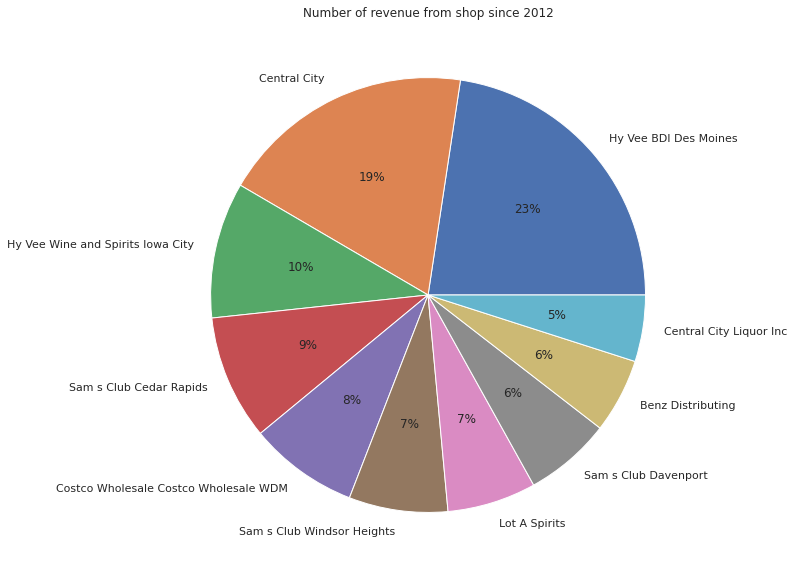

In [ ]:
revenue_store = []
for i in df['store_number'].unique():
  if df['sale_dollars'].loc[df['store_number']==i].sum() is not np.nan:
    revenue_store.append(df['sale_dollars'].loc[df['store_number']==i].sum())
values = revenue_store
keys = df['store_number'].unique()
c = dict(zip(keys, values))
TenHighest = nlargest(10, c, key = c.get)
va = []
for val in TenHighest: 
  va.append(c.get(val))
store_name = []
for i in TenHighest:
  st_name = " ".join(re.findall("[a-zA-Z]+",str(df['store_name'].loc[df['store_number']==i].unique())))
  store_name.append(st_name)

plt.title('Number of revenue from shop since 2012')
plt.pie([float(v) for v in va], labels=[k for k in store_name],
           autopct='%1.0f%%')

Selain menjadi pelanggan setia, Hy Vee BDI Des Moines juga memberi kontribusi pemasukan terbanyak

Apakah pemasukan dan profit masih selaras mengenai toko dengan pemberi profit terbanyak?

([<matplotlib.patches.Wedge at 0x7f6438cb4e10>,
 [Text(0.8357941193196751, 0.7151560599691853, 'Hy Vee BDI Des Moines'),
  Text(-0.4682712552545989, 0.9953502054564928, 'Central City'),
  Text(-1.0739035661081355, 0.23818297735192856, 'Hy Vee Wine and Spirits Iowa City'),
  Text(-1.0164966458677327, -0.4203981076784829, 'Sam s Club Cedar Rapids'),
  Text(-0.6477849627079122, -0.8890301693921917, 'Costco Wholesale Costco Wholesale WDM'),
  Text(-0.1549231738746005, -1.0890357249404725, 'Sam s Club Windsor Heights'),
  Text(0.32341152506078424, -1.0513824163727763, 'Lot A Spirits'),
  Text(0.7160011751313047, -0.8350702468718371, 'Sam s Club Davenport'),
  Text(0.9730424882808597, -0.5130188261654666, 'Benz Distributing'),
  Text(1.0867238525435627, -0.17038564585339044, 'Central City Liquor Inc')],
 [Text(0.45588770144709545, 0.39008512361955555, '23%'),
  Text(-0.25542068468432666, 0.5429182938853596, '19%'),
  Text(-0.5857655815135284, 0.12991798764650647, '10%'),
  Text(-0.5544527159

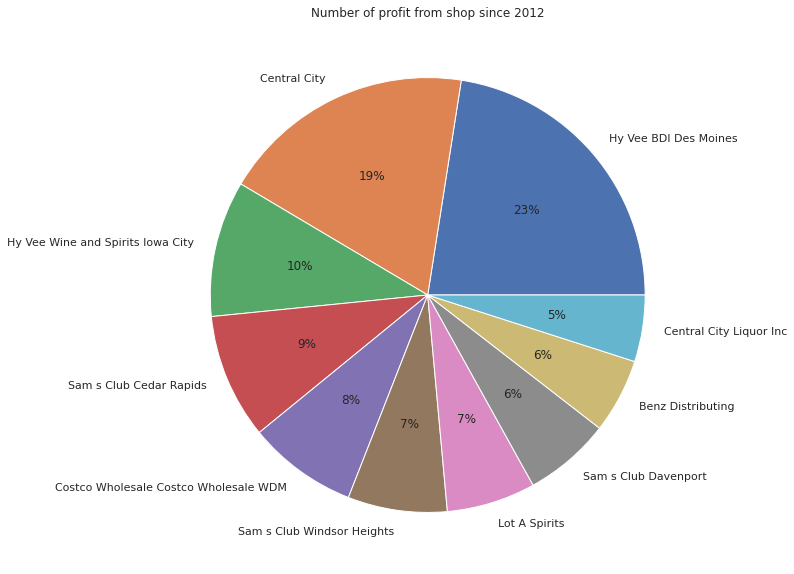

In [ ]:
profit_store = []
for i in df['store_number'].unique():
  if ((df['sale_dollars'].loc[df['store_number']==i])-(df['state_bottle_cost'].loc[df['store_number']==i]*df['bottles_sold'].loc[df['store_number']==i])).sum() is not np.nan:
    profit_store.append(((df['sale_dollars'].loc[df['store_number']==i])-(df['state_bottle_cost'].loc[df['store_number']==i]*df['bottles_sold'].loc[df['store_number']==i])).sum())
values = profit_store
keys = df['store_number'].unique()
c = dict(zip(keys, values))
TenHighest = nlargest(10, c, key = c.get)
va = []
for val in TenHighest: 
  va.append(c.get(val))
store_name = []
for i in TenHighest:
  st_name = " ".join(re.findall("[a-zA-Z]+",str(df['store_name'].loc[df['store_number']==i].unique())))
  store_name.append(st_name)

plt.title('Number of profit from shop since 2012')
plt.pie([float(v) for v in va], labels=[k for k in store_name],
           autopct='%1.0f%%')

Ternyata pemasukan tetap selaras dengan profit

Bagaimana dengan kota terbanyak yang membeli dari kami?

Sepertinya nama kota terkendala dengan case sensitive

In [ ]:
oldcityname = list(df['city'].values)
newcityname = [i.upper() for i in oldcityname]
del df['city']
df['city'] = newcityname

In [ ]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,zip_code,store_location,county_number,county,category,vendor_number,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,category_name,vendor_name,city
0,S09349400004,2012-12-06,2635,Hy-Vee #4 / Davenport,4064 E 53RD ST,52807,POINT (-90.513769 41.574973),82,Scott,1011500,306,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,12,STRAIGHT RYE WHISKIES,MISSISSIPPI RIVER DISTILLING CO.,DAVENPORT
1,S09502700005,2012-12-17,2604,Hy-Vee Wine and Spirits / Lemars,1201 12TH AVE SW,51031,POINT (-96.18335000000002 42.778257),75,Plymouth,1081700,346,86724,Ole Smoky Apple Pie Moonshine,12,750,15.08,22.62,36,814.32,27.0,7.13,2012,12,DISTILLED SPIRITS SPECIALTY,"OLE SMOKY DISTILLERY, LLC",LEMARS
2,S08968400072,2012-11-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,52804,POINT (-90.611972 41.538207),82,Scott,1011500,306,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,11,STRAIGHT RYE WHISKIES,MISSISSIPPI RIVER DISTILLING CO.,DAVENPORT
3,S08974000005,2012-11-15,3838,Schnucks / Bettendorf,858 MIDDLE RD,52722,POINT (-90.520013 41.539421),48,Iowa,1011500,306,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.5,3.57,2012,11,STRAIGHT RYE WHISKIES,MISSISSIPPI RIVER DISTILLING CO.,BETTENDORF
4,S04572500001,2012-03-15,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,52804,POINT (-90.611972 41.538207),82,Scott,1701100,192,3310,Jagermeister w/Flask,12,750,11.58,17.37,96,1667.52,72.0,19.02,2012,3,DECANTERS & SPECIALTY PACKAGES,SIDNEY FRANK IMPORTING CO.,DAVENPORT


([<matplotlib.patches.Wedge at 0x7fbc455e4da0>,
 [Text(0.8471241347492604, 0.7016984397341333, 'DES MOINES'),
  Text(-0.3928778268953775, 1.0274468419991207, 'CEDAR RAPIDS'),
  Text(-1.043215430964916, 0.348857513315515, 'DAVENPORT'),
  Text(-1.062772676007676, -0.2837503112447341, 'SIOUX CITY'),
  Text(-0.7936417044575232, -0.7616645225726071, 'COUNCIL BLUFFS'),
  Text(-0.35122044586714485, -1.042422274514932, 'WATERLOO'),
  Text(0.14444050139037923, -1.0904755575243748, 'IOWA CITY'),
  Text(0.6063604466303193, -0.9177837483646569, 'WEST DES MOINES'),
  Text(0.930304271297077, -0.5869701549537375, 'DUBUQUE'),
  Text(1.0817791668384014, -0.19938363572373333, 'AMES')],
 [Text(0.46206770986323287, 0.38274460349134537, '22%'),
  Text(-0.21429699648838768, 0.5604255501813384, '18%'),
  Text(-0.569026598708136, 0.19028591635391726, '11%'),
  Text(-0.5796941869132778, -0.15477289704258224, '8%'),
  Text(-0.432895475158649, -0.41545337594869475, '8%'),
  Text(-0.19157478865480626, -0.56859396

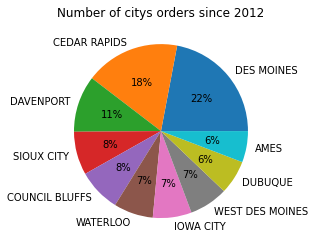

In [ ]:
counts = Counter(df['city'])
c = dict(counts)
TenHighest = nlargest(10, c, key = c.get)
va = []
for val in TenHighest: 
  va.append(c.get(val))

plt.title('Number of citys orders since 2012')
plt.pie([float(v) for v in va], labels=[k for k in TenHighest],
           autopct='%1.0f%%')

In [ ]:
df_chart = pd.DataFrame(c.items(), columns=['Item', 'Count'])
fig = px.pie(df_chart, values='Count', names='Item',title='TOTAL NUMBER OF CITY’S ORDERS')
fig.update_traces(textposition='inside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
fig.write_image("fig4.png")

Des Moines adalah kota paling banyak mengkonsumsi barang retail kami. Mungkin akan membuka warehouse/menambah warehouse di kota tersebut?

Kota mana yang merupakan pemasukan terbesar kami?

([<matplotlib.patches.Wedge at 0x7fbc456af550>,
 [Text(0.7466253380212986, 0.8078060439391263, 'DES MOINES'),
  Text(-0.5903486320266031, 0.9281640440484207, 'CEDAR RAPIDS'),
  Text(-1.0772494990411354, 0.22256126530828035, 'DAVENPORT'),
  Text(-1.0189406184698075, -0.4144393997104599, 'WEST DES MOINES'),
  Text(-0.6838842815206156, -0.8615696660682939, 'SIOUX CITY'),
  Text(-0.219967276155032, -1.077782166033998, 'COUNCIL BLUFFS'),
  Text(0.2813643394350374, -1.0634068405338972, 'IOWA CITY'),
  Text(0.7077105980604448, -0.8421078965268808, 'WATERLOO'),
  Text(0.9698955392281062, -0.518943776324007, 'DUBUQUE'),
  Text(1.0855743237151332, -0.17756234874103125, 'AMES')],
 [Text(0.4072501843752538, 0.44062147851225064, '26%'),
  Text(-0.32200834474178347, 0.506271296753684, '16%'),
  Text(-0.5875906358406193, 0.12139705380451654, '10%'),
  Text(-0.5557857918926222, -0.22605785438752354, '9%'),
  Text(-0.3730277899203358, -0.4699470905827057, '8%'),
  Text(-0.11998215063001744, -0.58788118

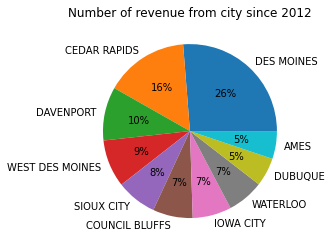

In [ ]:
revenue_city = []
for i in df['city'].unique():
  if df['sale_dollars'].loc[df['city']==i].sum() is not np.nan:
    revenue_city.append(df['sale_dollars'].loc[df['city']==i].sum())
values = revenue_city
keys = df['city'].unique()
c = dict(zip(keys, values))
TenHighest = nlargest(10, c, key = c.get)
va = []
for val in TenHighest: 
  va.append(c.get(val))

plt.title('Number of revenue from city since 2012')
plt.pie([float(v) for v in va], labels=[k for k in TenHighest],
           autopct='%1.0f%%')

In [ ]:
df_chart = pd.DataFrame(c.items(), columns=['Item', 'Count'])
fig = px.pie(df_chart, values='Count', names='Item',title='TOTAL REVENUE FROM THE CITY')
fig.update_traces(textposition='inside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
fig.write_image("fig5.png")

Kota Des Moines menjadi central penjualan kami karena merupakan kota dengan pemberi pemasukan bagi perusahaan ini

([<matplotlib.patches.Wedge at 0x7f6438515160>,
 [Text(0.7479265280465456, 0.8066014558902309, 'DES MOINES'),
  Text(-0.5879912822569936, 0.9296592128246656, 'CEDAR RAPIDS'),
  Text(-1.076827177082766, 0.2245957049811091, 'DAVENPORT'),
  Text(-1.0198283996156994, -0.41224996705552513, 'WEST DES MOINES'),
  Text(-0.6857913401181515, -0.8600524622480596, 'SIOUX CITY'),
  Text(-0.22211322872027509, -1.0773419668923396, 'COUNCIL BLUFFS'),
  Text(0.27918298873179526, -1.0639816064212682, 'IOWA CITY'),
  Text(0.7062618817179181, -0.8433232799065051, 'WATERLOO'),
  Text(0.9694571878690549, -0.5197622157189036, 'DUBUQUE'),
  Text(1.0855361597933326, -0.177795516763344, 'AMES')],
 [Text(0.4079599243890248, 0.4399644304855804, '26%'),
  Text(-0.32072251759472375, 0.5070868433589084, '16%'),
  Text(-0.5873602784087814, 0.12250674817151404, '10%'),
  Text(-0.5562700361540178, -0.22486361839392277, '9%'),
  Text(-0.3740680037008099, -0.4691195248625779, '8%'),
  Text(-0.12115267021105912, -0.587641

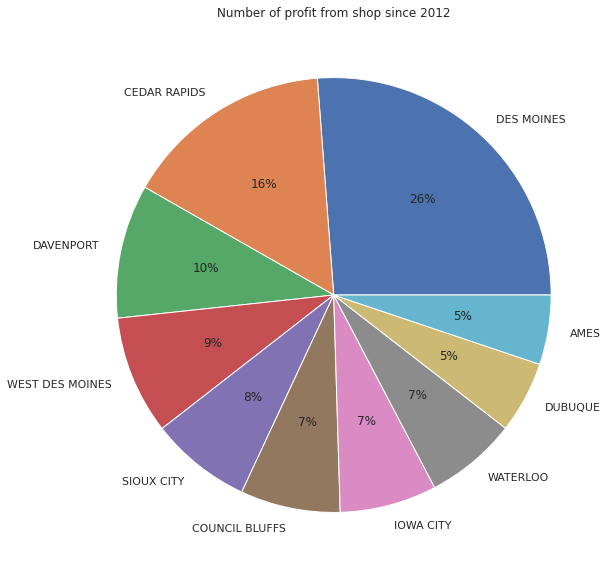

In [ ]:
profit_city = []
for i in df['city'].unique():
  if ((df['sale_dollars'].loc[df['city']==i])-(df['state_bottle_cost'].loc[df['city']==i]*df['bottles_sold'].loc[df['city']==i])).sum() is not np.nan:
    profit_city.append(((df['sale_dollars'].loc[df['city']==i])-(df['state_bottle_cost'].loc[df['city']==i]*df['bottles_sold'].loc[df['city']==i])).sum())
values = profit_city
keys = df['city'].unique()
c = dict(zip(keys, values))
TenHighest = nlargest(10, c, key = c.get)
va = []
for val in TenHighest: 
  va.append(c.get(val))

plt.title('Number of profit from shop since 2012')
plt.pie([float(v) for v in va], labels=[k for k in TenHighest],
           autopct='%1.0f%%')

Masih selaras antara pemasukan dengan keuntungan, kinerja yang bagus tim!